# TM10007 Assignment Group 5

In [7]:
# Run this to use from colab environment
!pip install -q --upgrade git+https://github.com/annawalstra/tm10007_Group5.git
!pip install simpleITK

## Data loading and cleaning

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

The number of spamples: 855
The number of columns: 268


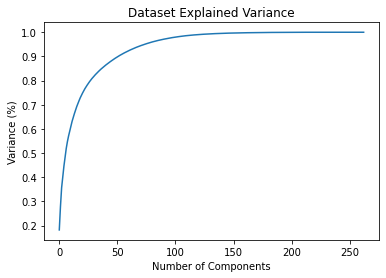

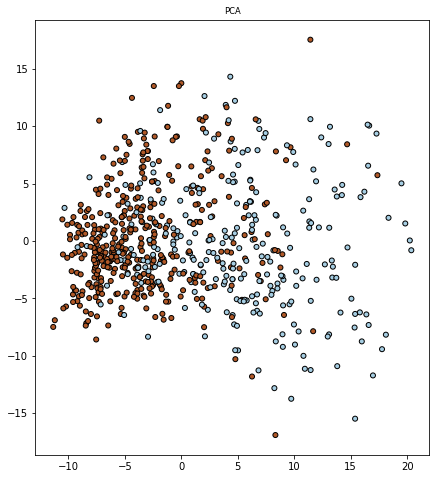

In [9]:
# General packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets as ds
import seaborn


# Classifiers
from sklearn import model_selection
from sklearn import metrics
from sklearn import feature_selection 
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import svm
from sklearn import decomposition
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

# Classifiers and kernels
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA, KernelPCA
from sklearn.kernel_approximation import RBFSampler
from sklearn.metrics.pairwise import rbf_kernel, sigmoid_kernel

# Too learn more about metrics see: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

# Data loading functions. Uncomment the one you want to use
from adni.load_data import load_data
data = load_data()
print(f'The number of spamples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')

# Creating X and Y 
X = data.loc[:, data.columns != 'label']
Y = data['label']

# Preprocessing: deleting features with only zeros
X = X.loc[:, (X != 0).any(axis=0)]
# print(f'The number of spamples: {len(X.index)}')
# print(f'The number of columns: {len(X.columns)}')

# Binarize Y labels
y_bin = preprocessing.label_binarize(Y, ['CN','AD'])
y_bin = [i[0] for i in y_bin]
#print(y_bin)

# Split the dataset in train and test part
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y_bin, test_size=0.2, stratify=y_bin)


# Scale the data 
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Fitting the PCA algorithm with our Data
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_scaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()


# Perform a PCA
pca = decomposition.PCA(n_components=50)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# # Use the selectfrommodel module: L1 Select all features with a weight above the median.
# from sklearn.feature_selection import SelectFromModel
# from sklearn.linear_model import Lasso, RidgeClassifier
# selector = SelectFromModel(estimator=Lasso(alpha=10**(-5)), threshold='median')
# selector.fit(X_train_scaled, Y_train)
# n_original = X_train_scaled.shape[1]
# X_train_L1 = selector.transform(X_train_scaled)
# X_test_L1 = selector.transform(X_test_scaled)
# n_selected = X_train_L1.shape[1]
# print(f"Selected {n_selected} from {n_original} features.")

#Plot first feature PCA
fig = plt.figure(figsize=(24,8))
ax = fig.add_subplot(131)
ax.set_title("PCA", fontsize='small')
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], marker='o', c=Y_train,
            s=25, edgecolor='k', cmap=plt.cm.Paired)


# #Plot first feature L1 selection
#fig = plt.figure(figsize=(24,8))
#ax = fig.add_subplot(132)
#ax.set_title("L1", fontsize='small')
#ax.scatter(X_train_L1[:, 0], X_train_L1[:, 1], marker='o', c=Y_train,
        #     s=25, edgecolor='k', cmap=plt.cm.Paired)


# Crossvalidation for parameter tuning
cv_10fold = model_selection.StratifiedKFold(n_splits=10)

## KNN Classifier

Vraag: met grid_search.best_estimator_ krijg ik als het beste resultaat k=33, maar als ik k=25 invul krijg ik een hoger resultaat voor test en train. 

vgm snap ik dit nu wel...Soms grid_search.best_estimator_ ander resultaat voor beste k dan clf.n_neigbors


In [10]:
# # Create a grid search to find the optimal k using a gridsearch and 10-fold cross validation
# # Specify the classifier
# knn = neighbors.KNeighborsClassifier()
# parameters = {"n_neighbors": list(range(1, 51, 2))}
# cv_10fold = model_selection.StratifiedKFold(n_splits=10)
# grid_search = model_selection.GridSearchCV(knn, parameters, cv=cv_10fold, scoring='accuracy')
# grid_search.fit(X_train_pca, Y_train)
# # Show the complete results of the cross validation
# display(pd.DataFrame(grid_search.cv_results_))


# # # Fit kNN
# # Get resulting classifier
# print(grid_search.best_estimator_)
# #print(f'Best classifier: k={clf.n_neighbors}')
# clf = neighbors.KNeighborsClassifier(n_neighbors=21)
# clf.fit(X_train_pca, Y_train)
# score_train = clf.score(X_train_pca, Y_train)
# score_test = clf.score(X_test_pca, Y_test)

# # Get the accuracy
# y_pred = clf.predict(X_train_pca)
# acc_train=metrics.accuracy_score(Y_train, y_pred)
# y_pred = clf.predict(X_test_pca)
# acc_test=metrics.accuracy_score(Y_test, y_pred)

# # Print result
# print(f"Training result: {score_train}")
# print(f"Test result: {score_test}")
# print(f"Accuracy:")
# print(f"Training result: {acc_train}")
# print(f"Test result: {acc_test}")


#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,50))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors,leaf_size=leaf_size, p=p)
#Create new KNN object
knn_2 = neighbors.KNeighborsClassifier()
#Use GridSearch
#cv_10fold = model_selection.StratifiedKFold(n_splits=10)
random_search = model_selection.RandomizedSearchCV(knn_2, hyperparameters, cv=cv_10fold)

#Fit the model
best_model = random_search.fit(X_train_pca,Y_train)
clf = random_search.best_estimator_

#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print(clf)

# Test train
from sklearn.metrics import classification_report
y_pred_train = clf.predict(X_train_pca)
print(classification_report(Y_train, y_pred_train))
# Test model

y_pred = clf.predict(X_test_pca)
print(classification_report(Y_test, y_pred))

Best leaf_size: 11
Best p: 1
Best n_neighbors: 17
KNeighborsClassifier(algorithm='auto', leaf_size=11, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=1,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.87      0.67      0.75       269
           1       0.81      0.93      0.87       415

    accuracy                           0.83       684
   macro avg       0.84      0.80      0.81       684
weighted avg       0.83      0.83      0.82       684

              precision    recall  f1-score   support

           0       0.79      0.61      0.69        67
           1       0.78      0.89      0.83       104

    accuracy                           0.78       171
   macro avg       0.78      0.75      0.76       171
weighted avg       0.78      0.78      0.78       171



## KNN with Crossvalidation


Best classifier: k=25
Best classifier: k=25
Best classifier: k=23
Best classifier: k=25
Best classifier: k=25
Best classifier: k=25
Best classifier: k=25
Best classifier: k=25
Best classifier: k=25
Best classifier: k=25
Best classifier: k=25
Best classifier: k=25
Best classifier: k=25
Best classifier: k=25
Best classifier: k=25
Best classifier: k=25
Best classifier: k=11
Best classifier: k=25
Best classifier: k=25
Best classifier: k=25


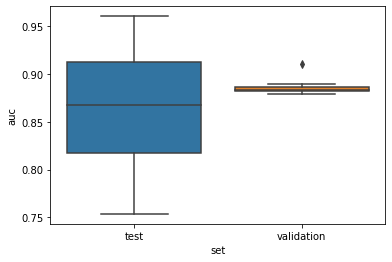

The optimal N=25
              precision    recall  f1-score   support

           0       0.77      0.61      0.68        67
           1       0.78      0.88      0.83       104

    accuracy                           0.78       171
   macro avg       0.78      0.75      0.76       171
weighted avg       0.78      0.78      0.77       171

0.7777777777777778


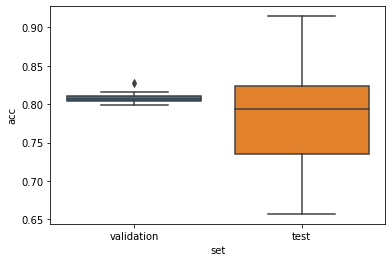

In [11]:
# Create a 20 fold stratified CV iterator
cv_20fold = model_selection.StratifiedKFold(n_splits=20)
results = []
results_acc = []
best_n_neighbors = []

# Loop over the folds
for validation_index, test_index in cv_20fold.split(X_train_pca, Y_train):
    # Split the data properly
    X_validation = X_train_pca[validation_index]
    y_validation = np.array(Y_train)[validation_index]
    
    X_testKNN = X_train_pca[test_index]
    y_testKNN = np.array(Y_train)[test_index]
    
    # Create a grid search to find the optimal k using a gridsearch and 10-fold cross validation
    # Same as above
    parameters = {"n_neighbors": list(range(1, 26, 2))}
    knn = neighbors.KNeighborsClassifier()
    cv_10fold = model_selection.StratifiedKFold(n_splits=10)
    grid_search = model_selection.GridSearchCV(knn, parameters, cv=cv_10fold, scoring='roc_auc')
    grid_search.fit(X_validation, y_validation)
    
    # Get resulting classifier
    clf = grid_search.best_estimator_
    print(f'Best classifier: k={clf.n_neighbors}')
    best_n_neighbors.append(clf.n_neighbors)
    
    # Test the classifier on the test data
    probabilities = clf.predict_proba(X_testKNN)
    scores = probabilities[:, 1]

    # Get the accuracy
    y_pred = clf.predict(X_validation)
    accuracy=metrics.accuracy_score(y_validation, y_pred)
    results_acc.append({'acc': accuracy,'set': 'validation'})
    y_pred = clf.predict(X_testKNN)
    accuracy = metrics.accuracy_score(y_testKNN, y_pred)
    results_acc.append({'acc': accuracy,'set': 'test'})
    
    # Get the auc
    auc = metrics.roc_auc_score(y_testKNN, scores)
    results.append({'auc': auc,'k': clf.n_neighbors,'set': 'test'})
    
    # Test the classifier on the validation data
    probabilities_validation = clf.predict_proba(X_validation)
    scores_validation = probabilities_validation[:, 1]
    
    # Get the auc
    auc_validation = metrics.roc_auc_score(y_validation, scores_validation)
    results.append({
        'auc': auc_validation,
        'k': clf.n_neighbors,
        'set': 'validation'
    })
    
# Create results dataframe and plot it
results = pd.DataFrame(results)
plt.show()
seaborn.boxplot(y='auc', x='set', data=results)
plt.show()
results_acc = pd.DataFrame(results_acc)
seaborn.boxplot(y='acc', x='set', data=results_acc)

optimal_n = int(np.median(best_n_neighbors))
print(f"The optimal N={optimal_n}")

from sklearn.metrics import classification_report

print(classification_report(Y_test, clf.predict(X_test_pca)))
#y_pred = clf.predict(X_test_pca)
print(clf.score(X_test_pca, Y_test))

# Support Vector Machine (SVM) Classifier 



In [13]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
 
  
# defining parameter range 
param_grid = {'C': [0.01, 0.5, 1],  
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['linear', 'rbf', 'poly'],
              'coef0': [0.01, 0.5, 1],
              'degree': [1, 3, 5]}  

# For now: 3 options for kernels implemented: linear rbf and poly
# Other options on kernels:
# - sampler, for example: first use RBF sampler, then linear kernel
# - manually constructed kernel function?
# - precomputed kernel
# - sigmoid kernel


grid = RandomizedSearchCV(SVC(probability=True), param_grid, refit=True, verbose=False, cv=cv_10fold) 
  
# fitting the model for grid search 
best_model = grid.fit(X_train_pca, Y_train) 
clf = grid.best_estimator_


print('Best slack parameter C:', grid.best_estimator_.get_params()['C'])
print('Best gamma:', grid.best_estimator_.get_params()['gamma'])
print('Best kernel:', grid.best_estimator_.get_params()['kernel'])
print('Best coef0:', grid.best_estimator_.get_params()['coef0'])
print('Best degree:', grid.best_estimator_.get_params()['degree'])

# Classification report (training data)
y_pred_train = clf.predict(X_train_pca)
print(classification_report(Y_train, y_pred_train))

# Classification report (test data)
y_pred_test = clf.predict(X_test_pca)
print(classification_report(Y_test, y_pred_test))



Best slack parameter C: 0.5
Best gamma: 0.01
Best kernel: poly
Best coef0: 0.01
Best degree: 1
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       269
           1       0.86      0.92      0.89       415

    accuracy                           0.86       684
   macro avg       0.86      0.84      0.85       684
weighted avg       0.86      0.86      0.86       684

              precision    recall  f1-score   support

           0       0.83      0.66      0.73        67
           1       0.81      0.91      0.86       104

    accuracy                           0.81       171
   macro avg       0.82      0.79      0.79       171
weighted avg       0.81      0.81      0.81       171



# SVM with cross-validation

Best slack parameter: C=0.01
Best gamma: gamma=0.01
Best kernel: kernel=poly
Best coef0: coef0=1
Best degree: degree=1


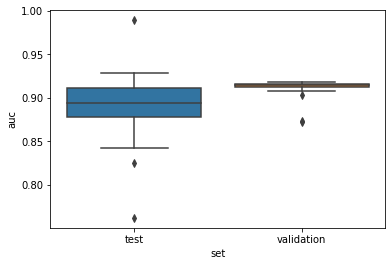

The optimal C=0.2
The optimal gamma=0.2
The optimal kernel=linear
The optimal coef0=0.4
The optimal degree=2.5
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        67
           1       0.81      0.91      0.86       104

    accuracy                           0.82       171
   macro avg       0.82      0.79      0.80       171
weighted avg       0.82      0.82      0.81       171

0.8187134502923976


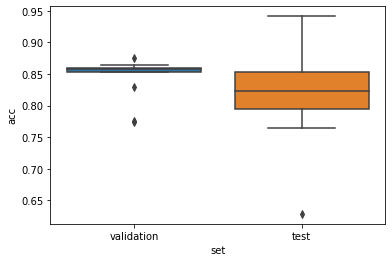

In [14]:
# Create a 20 fold stratified CV iterator
cv_20fold = model_selection.StratifiedKFold(n_splits=20)
results = []
results_acc = []
best_C = []
best_gamma = []
best_kernel = []
best_coef0 = []
best_degree = []

# Program to find most frequent  
# element in a list 
def most_frequent(List): 
    return max(set(List), key = List.count) 

# Loop over the folds
for validation_index, test_index in cv_20fold.split(X_train_pca, Y_train):
    # Split the data properly
    X_validation = X_train_pca[validation_index]
    Y_validation = np.array(Y_train)[validation_index]
    
    X_test_SVM = X_train_pca[test_index]
    Y_test_SVM = np.array(Y_train)[test_index]
    
    
    # Same as above
    param_grid = {'C': [0.01, 0.5, 1],  
              'gamma': [1, 0.1, 0.01], 
              'kernel': ['linear', 'rbf', 'poly'],
              'coef0': [0.01, 0.5, 1],
              'degree': [1, 3, 5]}
    grid = RandomizedSearchCV(SVC(probability=True), param_grid, refit=True, verbose=False, cv=cv_10fold, scoring='roc_auc')  
    best_model = grid.fit(X_validation, Y_validation)

    
    # Get resulting classifier
    clf = grid.best_estimator_
    print(f'Best slack parameter: C={clf.C}')
    print(f'Best gamma: gamma={clf.gamma}')
    print(f'Best kernel: kernel={clf.kernel}')
    print(f'Best coef0: coef0={clf.coef0}')
    print(f'Best degree: degree={clf.degree}')

    best_C.append(clf.C)
    best_gamma.append(clf.gamma)
    best_kernel.append(clf.kernel)
    best_coef0.append(clf.coef0)
    best_degree.append(clf.degree)
    
    # Test the classifier on the test data
    probabilities = clf.predict_proba(X_test_SVM)
    scores = probabilities[:, 1]

    # Get the accuracy
    Y_pred = clf.predict(X_validation)
    accuracy=metrics.accuracy_score(Y_validation, Y_pred)
    results_acc.append({'acc': accuracy,'set': 'validation'})
    Y_pred = clf.predict(X_test_SVM)
    accuracy = metrics.accuracy_score(Y_test_SVM, Y_pred)
    results_acc.append({'acc': accuracy,'set': 'test'})
    
    # Get the auc
    auc = metrics.roc_auc_score(Y_test_SVM, scores)
    results.append({'auc': auc,'C': clf.C, 'gamma': clf.gamma, 
                    'kernel': clf.kernel, 'coef0': clf.coef0, 
                    'degree': clf.degree,'set': 'test'})
    
    # Test the classifier on the validation data
    probabilities_validation = clf.predict_proba(X_validation)
    scores_validation = probabilities_validation[:, 1]
    
    # Get the auc
    auc_validation = metrics.roc_auc_score(Y_validation, scores_validation)
    results.append({
        'auc': auc_validation,
        'C': clf.C,
        'gamma': clf.gamma,
        'kernel': clf.kernel,
        'coef0': clf.coef0,
        'degree': clf.degree,
        'set': 'validation'
    })
    
# Create results dataframe and plot it
results = pd.DataFrame(results)
plt.show()
seaborn.boxplot(y='auc', x='set', data=results)
plt.show()
results_acc = pd.DataFrame(results_acc)
seaborn.boxplot(y='acc', x='set', data=results_acc)

optimal_C = (np.mean(best_C))
print(f"The optimal C={optimal_C:.1f}")
optimal_gamma = (np.mean(best_gamma))
print(f"The optimal gamma={optimal_gamma:.1f}")
optimal_kernel = (most_frequent(best_kernel)) 
print(f"The optimal kernel={optimal_kernel}")
optimal_coef0 = (np.mean(best_coef0))
print(f"The optimal coef0={optimal_coef0:.1f}")
optimal_degree = (np.mean(best_degree))
print(f"The optimal degree={optimal_degree:.1f}")

grid = SVC(C=round(optimal_C,1), gamma=round(optimal_gamma,1), kernel=optimal_kernel,
          coef0=round(optimal_coef0,1), degree=round(optimal_degree,1))

# fitting the model for grid search 
clf = grid.fit(X_train_pca, Y_train) 

from sklearn.metrics import classification_report

print(classification_report(Y_test, clf.predict(X_test_pca)))
#y_pred = clf.predict(X_test_pca)
print(clf.score(X_test_pca, Y_test))


**Random Forrest Classifier**

The Random Forrest Classifier has 19 different hyperparameters:
- n_estimators: number of trees (to much --> overfitting)
- criterion: How to measure the quality of a split (gini) (tree-specific)
- max_depth: depth of the tree
- min_samples_split: minimum number of samples required to split an internal node
- min_samples_leaf: number of samples required to be at a node
- min_weight_fraction_leaf: sum total of the weigths at a node.
- max_features: number of features to consider
- max_leaf_nodes: 
- min_impurity_decrease: node will split if impurity decreases with this value
- min_impurity_split: A node will split if its impurity is above the threshold, otherwise it is a leaf
- bootstrap: use or not (T/F) (To improve accuracy by creating samples)
if T --> max_samples: number of samples to train each base estimator
- oob_score: use out-of-bag samples
- n_jobs: 
- random_state: 
- verbose:
- warm_start:
- class_weight: If one class is more important
- ccp_alpha: x

--> Misschien toevoegen: een tijd segment om te kijken of het niet te lang duurt




In [34]:
#Hyperparameters tuning:
n_tree = [50]                         # n_estimators
boot = ['True','False']               # Bootstrapping
criterion = ['gini','entropy']        # measure of quality
max_depth = list(range(5,16))         # Depth of the tree
min_samples_split = list(range(2,10)) # prevends overfitting
min_samples_leaf = [3,4,5,6,7]        # prevends overfitting
classweight = [{0: 1, 1: 0.001},{0: 1, 1: 1},
               {0: 1, 1: 10},{0: 1, 1: 100}]  # Weight of class

param_grid = {'n_estimators': n_tree,  
              'bootstrap': boot, 
              'criterion': criterion,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'class_weight': classweight} 

grid = RandomizedSearchCV(RandomForestClassifier(), param_grid, refit=True, verbose=False, cv=cv_10fold) 
  
# fitting the model for grid search 
best_model = grid.fit(X_train_pca, Y_train) 
clf = grid.best_estimator_

print('Best number of trees:', grid.best_estimator_.get_params()['n_estimators'])
print('Best Bootstrapping:', grid.best_estimator_.get_params()['bootstrap'])
print('Best criterion:', grid.best_estimator_.get_params()['criterion'])
print('Best max depth:', grid.best_estimator_.get_params()['max_depth'])
print('Best min samples split:', grid.best_estimator_.get_params()['min_samples_split'])
print('Best samples leaf:', grid.best_estimator_.get_params()['min_samples_leaf'])
print('Best classweight:', grid.best_estimator_.get_params()['class_weight'])

# Classification report (training data)
y_pred_train = clf.predict(X_train_pca)
print(classification_report(Y_train, y_pred_train))

# Classification report (test data)
y_pred_test = clf.predict(X_test_pca)
print(classification_report(Y_test, y_pred_test))



Best number of trees: 50
Best Bootstrapping: False
Best criterion: entropy
Best max depth: 13
Best min samples split: 5
Best samples leaf: 3
Best classweight: {0: 1, 1: 1}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       269
           1       1.00      1.00      1.00       415

    accuracy                           1.00       684
   macro avg       1.00      1.00      1.00       684
weighted avg       1.00      1.00      1.00       684

              precision    recall  f1-score   support

           0       0.82      0.67      0.74        67
           1       0.81      0.90      0.85       104

    accuracy                           0.81       171
   macro avg       0.81      0.79      0.80       171
weighted avg       0.81      0.81      0.81       171

